# Kaggle Competition Predictive Maintenance

Hackathon on NASA Turbofan data

**Goal**  
The goal of this challenge is to predict whether or not some turbofan engines are going to break down within the next 100 cycles. The dataset consists of different multivariate time-series. These different time-series refer to different engines ( engineno in the dataset). The sampling of the time series is 1 point per engine cycle ( timein_cycles in the dataset). The dataset is split into train data and test data to evaluate your model. In the train dataset: the engine runs until failure. It means that for each data point we can associate the RUL (Remaining Useful Life in cycles). This column is present in the train dataset (RUL). In the test dataset: The engine runs until a certain point. What you need to predict is whether or not the engine is going to fail whithin the next 100 cycles. 

Eric Picot and NaNFromage. (2020). Predictive maintenance. Kaggle. https://kaggle.com/competitions/prehackathonsup


## Data-Import and Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

project_path = r'C:/Users/palig/MSE/Vertiefungsprojekt1/mse_vp1_rulestimation'

# Add the path to sys.path if it does not already exist
if project_path not in sys.path:
    sys.path.append(project_path)

data_path = os.path.join(project_path, 'data')

df_train = pd.read_csv(os.path.join(data_path, 'kaggle', 'train_data', 'train_data.csv'))
df_test = pd.read_csv(os.path.join(data_path, 'kaggle', 'test_data', 'test_data.csv'))

display(df_train.head())
display(df_test.head())

,engine_no,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,RUL
0,0,1,25.0074,0.6200,60.0,462.54,536.84,1256.52,1043.97,7.05,...,84.93,14.35,8.4712,NaN,NaN,NaN,NaN,NaN,NaN,339
1,0,2,35.0072,0.8413,100.0,449.44,555.44,1364.42,1128.75,5.48,...,100.00,14.88,8.9928,NaN,NaN,NaN,NaN,NaN,NaN,338
2,0,3,25.0053,0.6215,60.0,462.54,536.42,1265.94,1047.23,7.05,...,84.93,14.21,8.5107,NaN,NaN,NaN,NaN,NaN,NaN,337
3,0,4,42.0045,0.8407,100.0,445.00,549.41,1355.52,1115.81,3.91,...,100.00,10.63,6.4578,NaN,NaN,NaN,NaN,NaN,NaN,336
4,0,5,35.0046,0.8400,100.0,449.44,555.21,1361.04,1123.63,5.48,...,100.00,14.95,9.0279,NaN,NaN,NaN,NaN,NaN,NaN,335


,engine_no,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27
0,0,1,42.0034,0.8400,100.0,445.00,549.36,1342.05,1124.56,3.91,...,2212,100.0,10.69,6.3956,NaN,NaN,NaN,NaN,NaN,NaN
1,0,2,42.0017,0.8400,100.0,445.00,548.83,1351.93,1116.28,3.91,...,2212,100.0,10.55,6.3775,NaN,NaN,NaN,NaN,NaN,NaN
2,0,3,0.0028,0.0019,100.0,518.67,642.35,1583.74,1400.44,14.62,...,2388,100.0,38.85,23.3483,NaN,NaN,NaN,NaN,NaN,NaN
3,0,4,42.0047,0.8400,100.0,445.00,549.69,1354.36,1125.55,3.91,...,2212,100.0,10.56,6.4871,NaN,NaN,NaN,NaN,NaN,NaN
4,0,5,10.0058,0.2506,100.0,489.05,604.72,1496.65,1310.52,10.52,...,2319,100.0,28.78,17.1987,NaN,NaN,NaN,NaN,NaN,NaN


As you can see, sensors 22 to 27 have no data. They can therefore be removed from the data set.

In [3]:
df_train_describe = df_train.describe()
display(df_train_describe)

no_data_cols = df_train_describe.columns[df_train_describe.loc['count'] == 0.0]
print(no_data_cols)

df_train = df_train.drop(columns=no_data_cols)
df_test = df_test.drop(columns=no_data_cols)
display(df_train)

,engine_no,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,RUL
count,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,...,160359.000000,160359.000000,160359.000000,0.0,0.0,0.0,0.0,0.0,0.0,160359.000000
mean,353.441665,123.331338,17.211973,0.410004,95.724344,485.840890,597.361022,1467.035653,1260.956434,9.894999,...,98.389146,25.942709,15.565700,NaN,NaN,NaN,NaN,NaN,NaN,122.331338
std,205.969348,83.538146,16.527988,0.367938,12.359044,30.420388,42.478516,118.175261,136.300073,4.265554,...,4.656270,11.691422,7.015067,NaN,NaN,NaN,NaN,NaN,NaN,83.538146
min,0.000000,1.000000,-0.008700,-0.000600,60.000000,445.000000,535.480000,1242.670000,1023.770000,3.910000,...,84.930000,10.160000,6.010500,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,172.000000,57.000000,0.001300,0.000200,100.000000,449.440000,549.960000,1357.360000,1126.830000,5.480000,...,100.000000,14.330000,8.601300,NaN,NaN,NaN,NaN,NaN,NaN,56.000000
50%,355.000000,114.000000,19.998100,0.620000,100.000000,489.050000,605.930000,1492.810000,1271.740000,9.350000,...,100.000000,24.920000,14.953500,NaN,NaN,NaN,NaN,NaN,NaN,113.000000
75%,530.000000,173.000000,35.001500,0.840000,100.000000,518.670000,642.340000,1586.590000,1402.200000,14.620000,...,100.000000,38.820000,23.294600,NaN,NaN,NaN,NaN,NaN,NaN,172.000000
max,708.000000,543.000000,42.008000,0.842000,100.000000,518.670000,645.110000,1616.910000,1441.490000,14.620000,...,100.000000,39.890000,23.950500,NaN,NaN,NaN,NaN,NaN,NaN,542.000000


Index(['sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26',
       'sensor_27'],
      dtype='object')


,engine_no,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,0,1,25.0074,0.6200,60.0,462.54,536.84,1256.52,1043.97,7.05,...,2028.38,7875.47,10.8850,0.02,306,1915,84.93,14.35,8.4712,339
1,0,2,35.0072,0.8413,100.0,449.44,555.44,1364.42,1128.75,5.48,...,2388.20,8073.12,9.2527,0.02,334,2223,100.00,14.88,8.9928,338
2,0,3,25.0053,0.6215,60.0,462.54,536.42,1265.94,1047.23,7.05,...,2028.40,7884.88,10.9054,0.02,307,1915,84.93,14.21,8.5107,337
3,0,4,42.0045,0.8407,100.0,445.00,549.41,1355.52,1115.81,3.91,...,2388.13,8093.08,9.3434,0.02,331,2212,100.00,10.63,6.4578,336
4,0,5,35.0046,0.8400,100.0,449.44,555.21,1361.04,1123.63,5.48,...,2388.19,8078.18,9.3287,0.02,334,2223,100.00,14.95,9.0279,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160354,708,159,10.0040,0.2519,100.0,489.05,605.81,1508.72,1333.13,10.52,...,2388.43,8217.81,8.7244,0.03,374,2319,100.00,28.48,16.8884,4
160355,708,160,10.0074,0.2500,100.0,489.05,605.83,1509.90,1328.53,10.52,...,2388.42,8219.37,8.7173,0.03,373,2319,100.00,28.20,16.9498,3
160356,708,161,34.9982,0.8400,100.0,449.44,556.62,1374.56,1145.17,5.48,...,2389.86,8155.94,9.3958,0.02,338,2223,100.00,14.76,8.9228,2
160357,708,162,24.9993,0.6219,60.0,462.54,537.58,1274.92,1064.82,7.05,...,2029.95,7954.31,11.0572,0.02,309,1915,84.93,14.05,8.3890,1


### RUL (Remaining useful lifetime)

Now I would like to take a closer look at the distribution of the RUL values. To do this, I can either use the value of the column *RUL* at *time_in_cycles = 1* or the value of the column *time_in_cycles* at the last data point per *engine_no*. As a check, I will look at both and compare them.

In [ ]:
df_rul_train = df_train[['engine_no', 'time_in_cycles', 'RUL']]

#Method 1
rul_values1 = []

for index, row in df_rul_train.iterrows():
    if row['time_in_cycles'] == 1:
        rul_values1.append(row['RUL']+1)

print(rul_values1)

# Method 2
grouped = df_rul_train.groupby('engine_no')

max_cycle = grouped['time_in_cycles'].max()
rul_values2 = max_cycle.to_list()

print(rul_values2)

[340, 322, 161, 253, 184, 172, 308, 189, 148, 267, 242, 219, 212, 232, 308, 232, 193, 129, 148, 188, 203, 163, 341, 177, 254, 263, 347, 221, 211, 200, 278, 148, 266, 218, 181, 196, 262, 148, 274, 187, 228, 332, 181, 145, 365, 316, 161, 174, 297, 207, 214, 200, 184, 293, 155, 289, 341, 231, 273, 158, 321, 170, 259, 221, 205, 351, 170, 256, 244, 213, 194, 205, 424, 290, 491, 163, 225, 301, 137, 221, 361, 144, 195, 164, 218, 150, 406, 194, 327, 187, 188, 192, 435, 257, 211, 309, 269, 239, 194, 230, 202, 200, 190, 232, 193, 271, 199, 209, 170, 206, 198, 190, 174, 218, 324, 378, 195, 280, 181, 185, 202, 255, 190, 218, 170, 418, 187, 146, 194, 170, 180, 245, 149, 178, 231, 259, 177, 193, 158, 185, 388, 234, 321, 199, 154, 212, 217, 267, 298, 240, 210, 354, 239, 184, 193, 172, 288, 211, 344, 168, 158, 210, 148, 293, 175, 280, 227, 525, 196, 239, 149, 280, 223, 274, 190, 186, 140, 263, 231, 219, 343, 224, 228, 172, 227, 246, 212, 168, 251, 342, 178, 203, 202, 447, 143, 199, 195, 194, 171, 183,

In [5]:
for i, (value1, value2) in enumerate(zip(rul_values1, rul_values2)):
    diff = value1 - value2
    if diff > 0:
        print(f'Error, unequal RUL value for i={i}')


The RUL values correspond to the life cycle values.

Now I would like to look at the distribution of the RUL values.

Text(0, 0.5, 'Count')

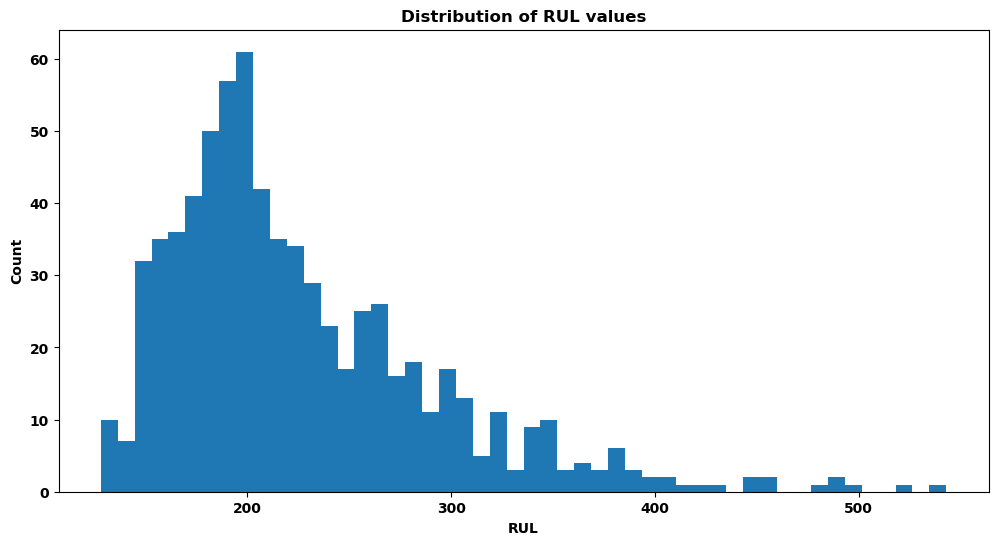

In [7]:
plt.figure(figsize=(12,6))

plt.hist(rul_values1, bins=50)
plt.title('Distribution of RUL values')
plt.xlabel('RUL')
plt.ylabel('Count')

### Operation Settings
Now I would like to plot the behaviour of the 3 operation settings over the time until failure. Because plotting all 708 drives would be confusing, I will only use the first 3 drives.

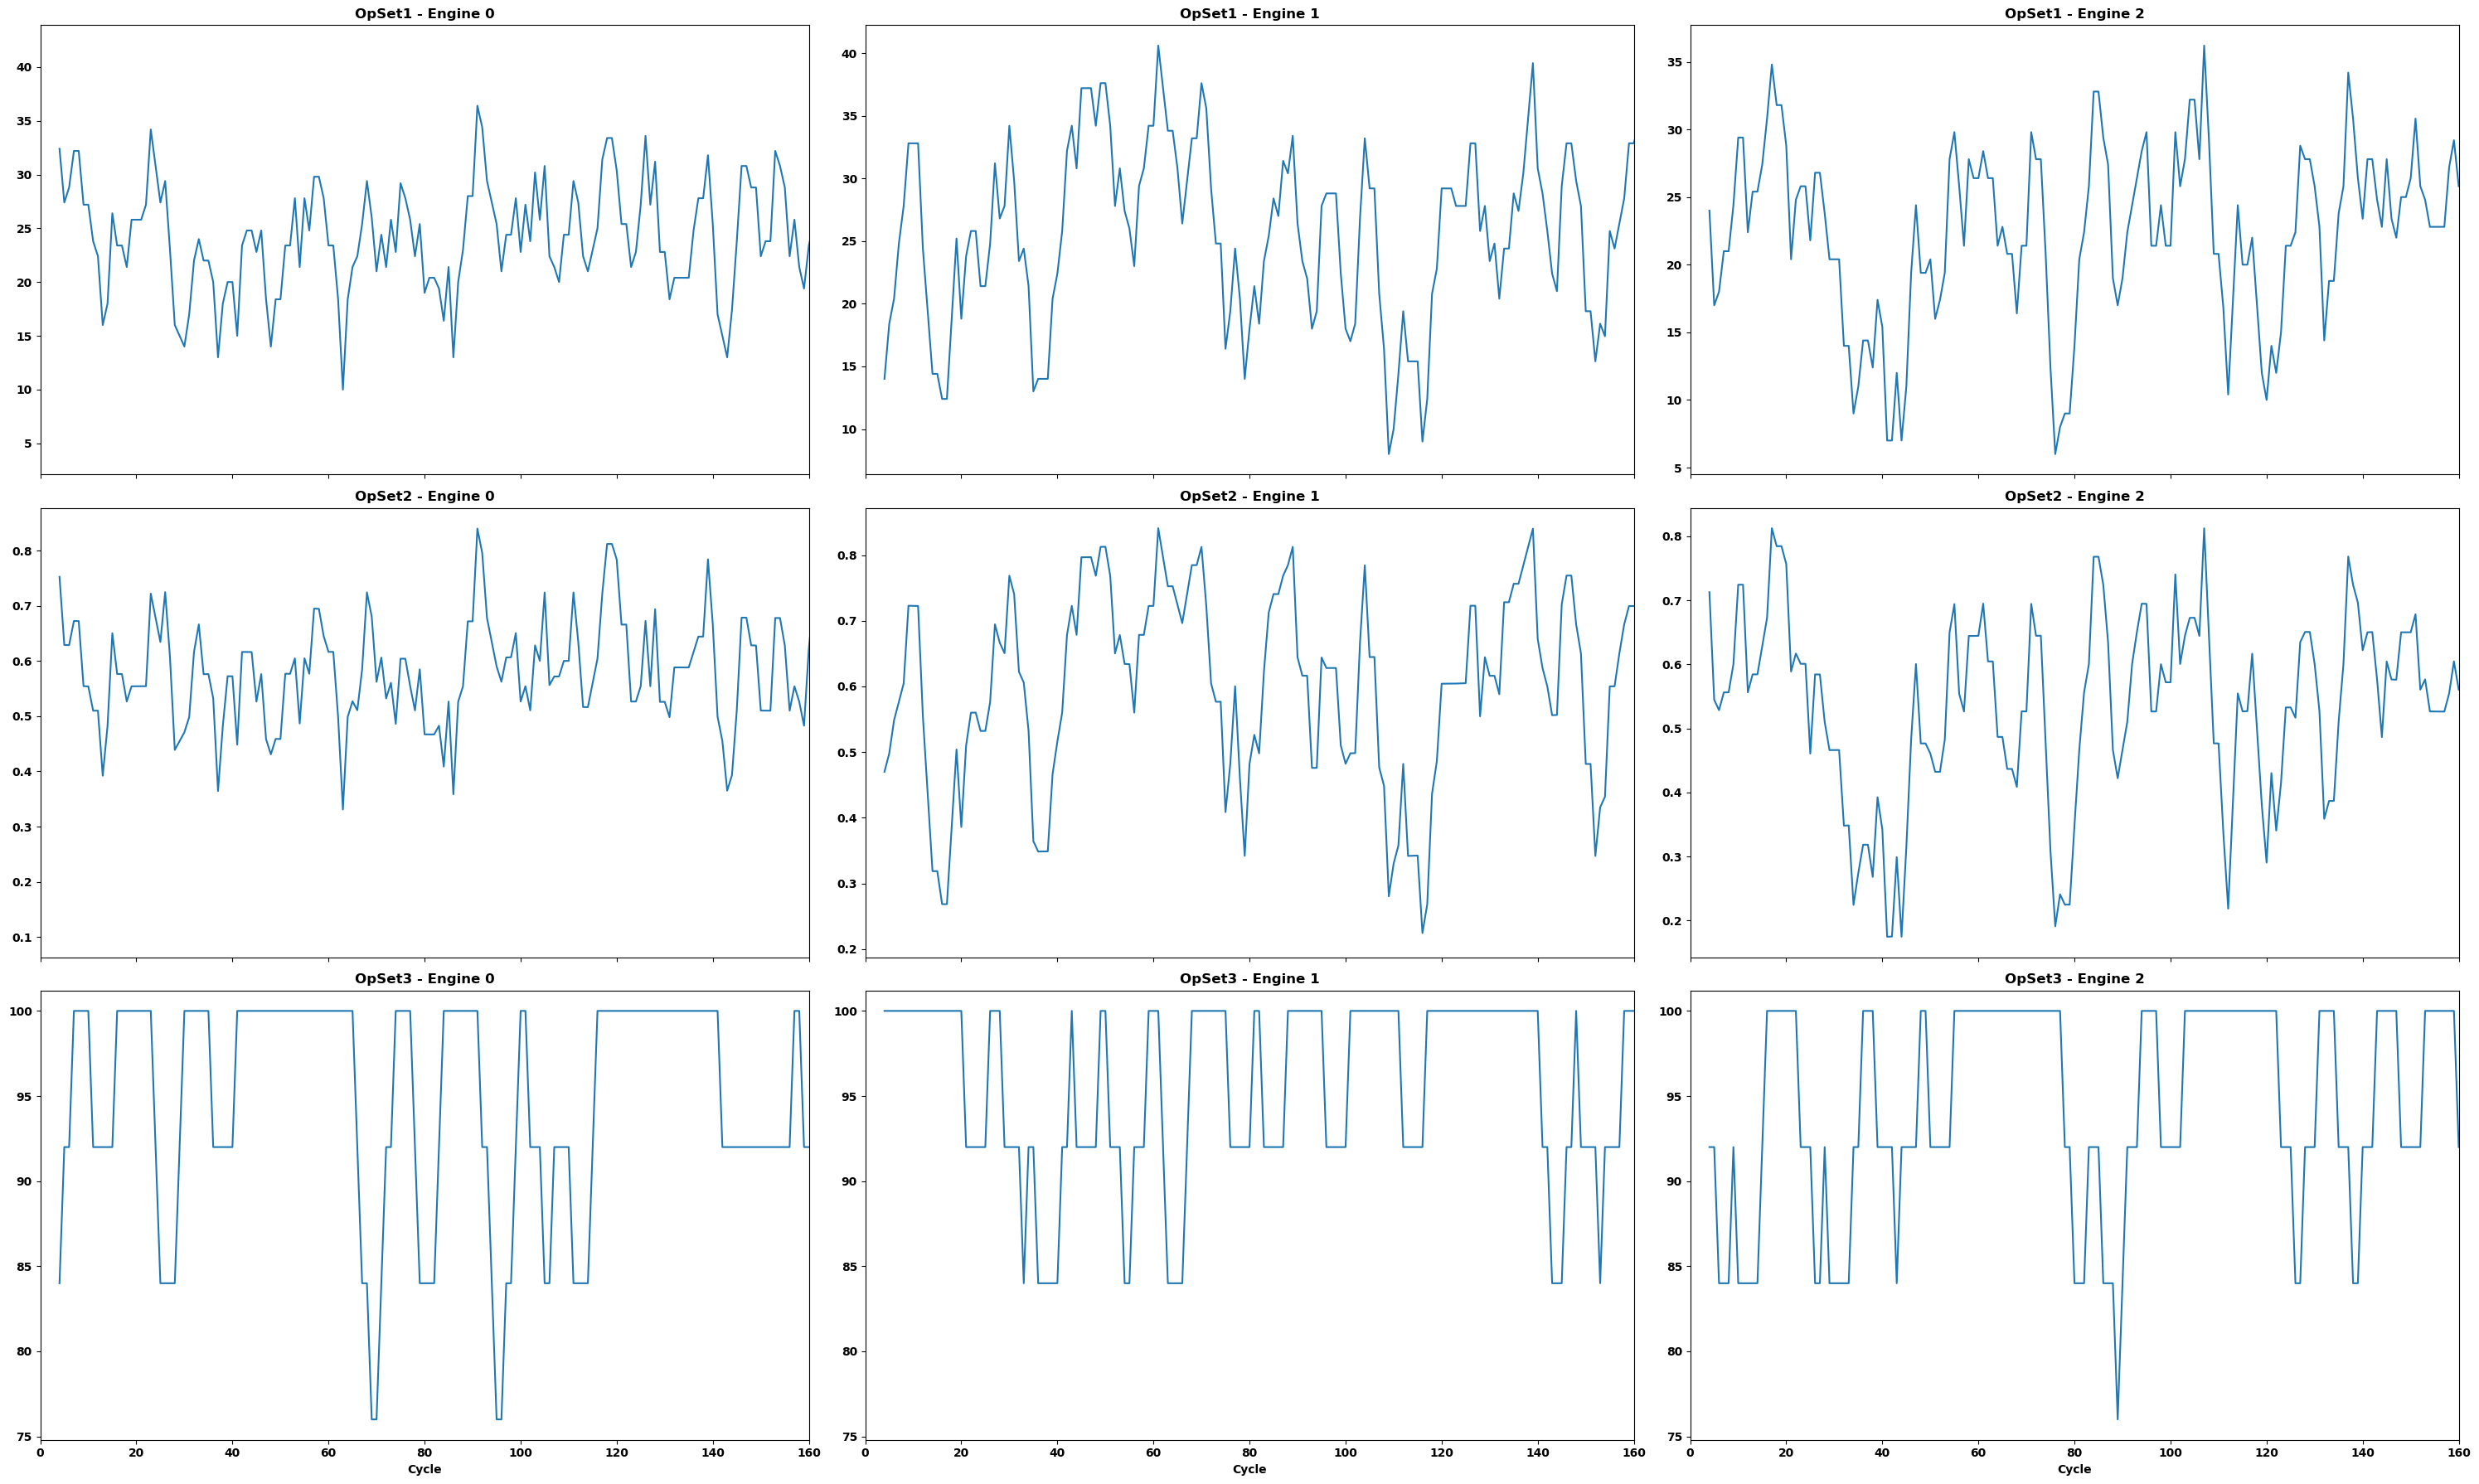

In [10]:
fig,ax=plt.subplots(3,3,figsize=(30,18),sharex='all')
for i in range(0, 3):
    for y in range(0, 3):
        # Filter for the specific 'engine_no' and make sure we create a copy
        df_op_set = df_train[df_train['engine_no'] == y].copy()

        # Calculate the moving average with .loc to make the assignment
        df_op_set.loc[:, 'rolling_avg'] = df_op_set['op_setting_' + str(i + 1)].rolling(window=5).mean()
        
        # Set the X-axis from 0 to the length of the group (renumber cycles)
        df_op_set = df_op_set.reset_index(drop=True)
        
        # Select the corresponding axis object (2D array ax[i, y])
        df_op_set['rolling_avg'].plot(kind="line", ax=ax[i, y])
        
        # Set the title and the axis labels
        ax[i, y].set_title(f'OpSet{i + 1} - Engine {y}')
        ax[i, y].set_xlabel("Cycle")
        
        # X-axis always starts at 0, separate scaling for each group
        ax[i, y].set_xlim(0, len(df_op_set) - 1)

plt.tight_layout()
plt.show()

No specific trend towards the end of the service life can be recognised here. However, the operational settings can still have an influence on the result.

During the testing of the algorithms, further research revealed that the sensor data for normalisation should be categorised based on the operating conditions. This allows the degradation to be better learnt.

### Sensors
Now I would like to plot the behaviour of the sensors of a random drive. What is striking about these plots is that the value does not change for some sensors. If this is also the case with other drives, these sensors can be removed immediately.

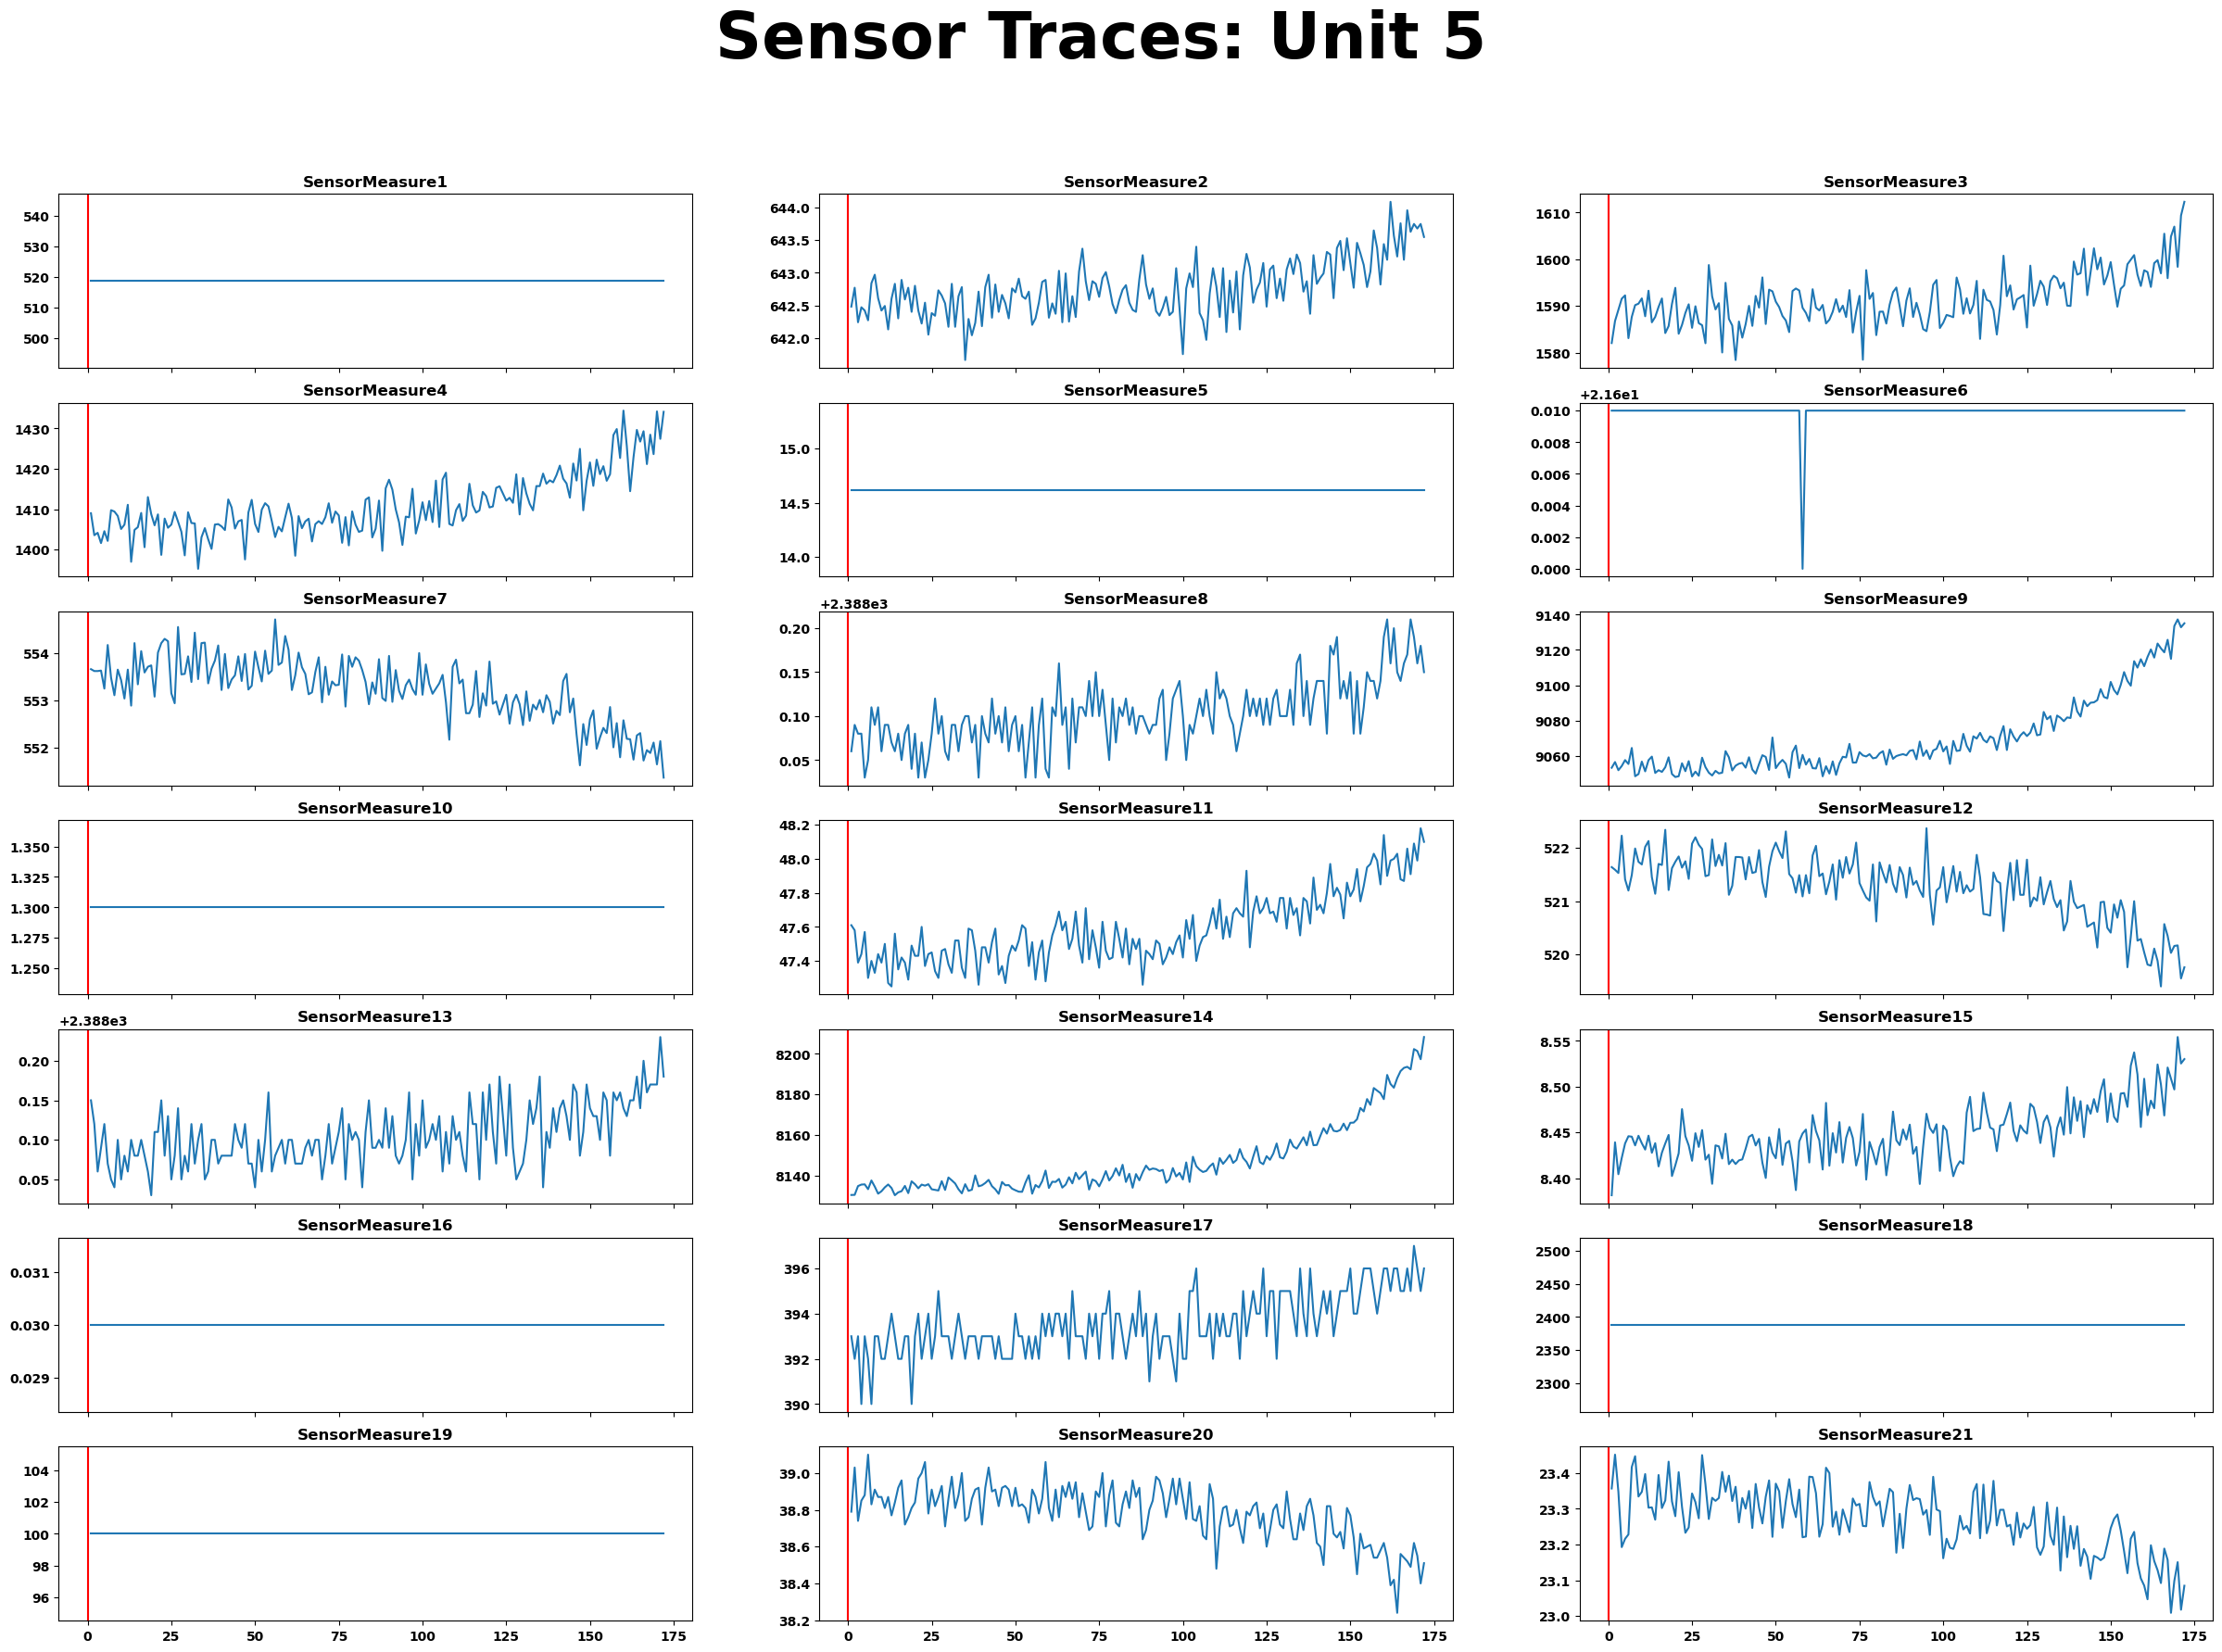

In [9]:
fig,ax=plt.subplots(7,3,figsize=(30,20),sharex=True)
df_u1=df_train.query('engine_no==5')
c=0
for i in range(0,7):
    for j in range(0,3):
        ax[i,j].plot(df_u1.time_in_cycles.values, df_u1['sensor_'+str(c+1)])
        ax[i,j].set_title('SensorMeasure'+str(c+1))
        ax[i,j].axvline(0,c='r')
        c+=1
plt.suptitle('Sensor Traces: Unit 5',fontsize=50)
plt.show()

The next step is to check whether there are sensors for which the values do not change across all drives.

In [ ]:
# List of columns that have "sensor" in their name
sensor_columns = [col for col in df_train.columns if 'sensor' in col]

# List for sensor columns that are constant
unchanged_sensors_across_all_engines = []

# Iterate over each sensor column
for col in sensor_columns:
    # Check whether the values in the sensor column are constant for each engine_no
    constant_for_all_engines = df_train.groupby('engine_no')[col].nunique().eq(1).all()
    
    # If the sensor value is constant for each engine_no, add to the list
    if constant_for_all_engines:
        unchanged_sensors_across_all_engines.append(col)

# Show result
if unchanged_sensors_across_all_engines:
    print("The following sensor columns have constant values for each engine_no:")
    print(unchanged_sensors_across_all_engines)
else:
    print("All sensor columns have varying values in at least one engine_no.")


Alle Sensor-Spalten haben variierende Werte in mindestens einer engine_no.


This means that all sensors should be used.
A more detailed analysis of the *feature import* is not carried out for the time being. Depending on the model, this may not be necessary as the model can learn this itself.

## Normalisation

Using the example of the paper "Remainingusefullife withself-attention assisted physics-informed neural network" and its source code, the sensor data is not normalised across the board. There are three operating conditions that change. To learn the degradation, the sensor values should be categorised according to similar operating conditions and then normalised. Otherwise, important information from the sensor data is lost.

This was no longer used in the project. However, here is an example of what normalisation with clustering could look like based on the operating conditions.

c:\Users\palig\miniconda3\envs\delearn\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


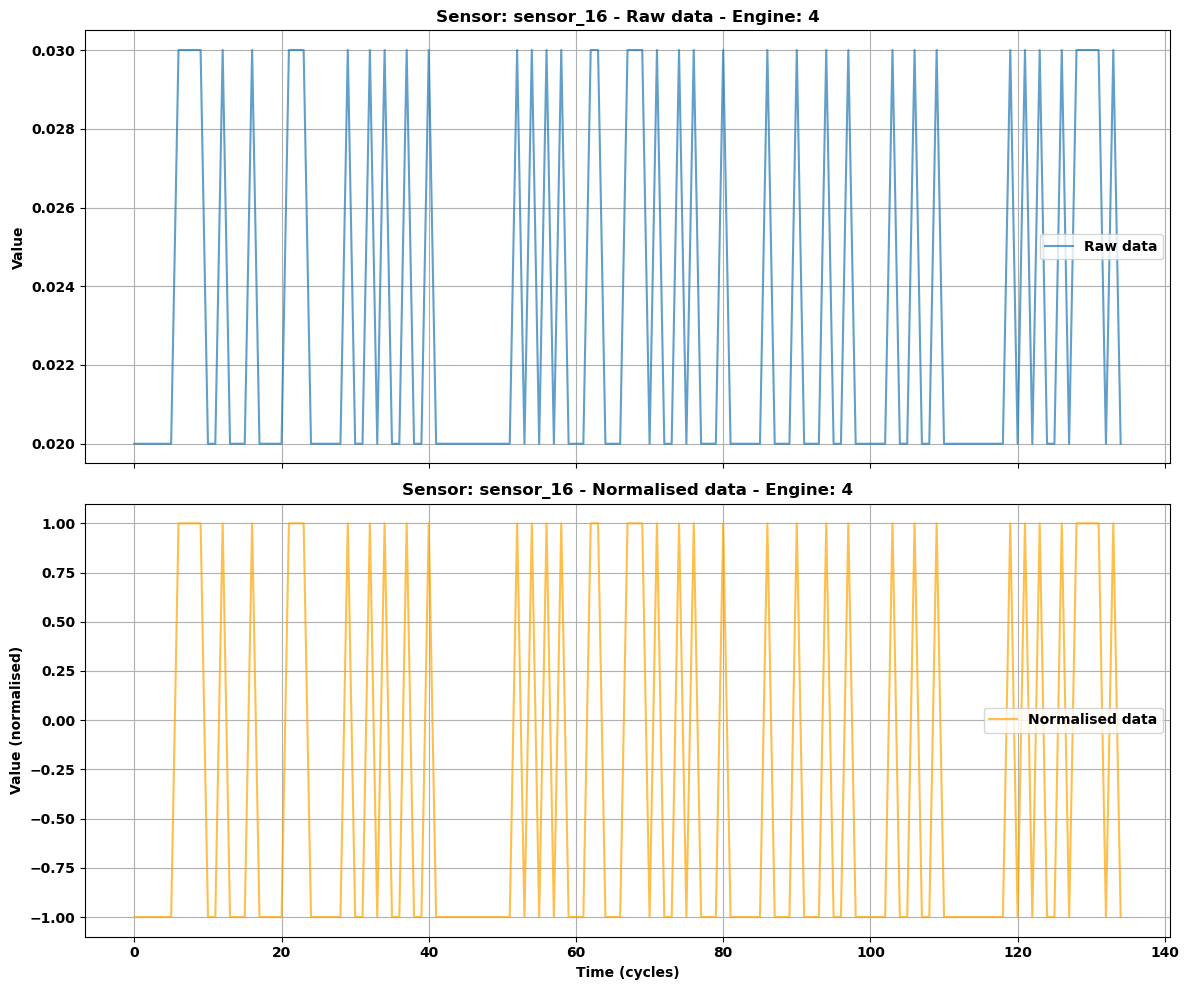

Normalisation completed.


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function for grouping and normalising data based on clustering of operating conditions
def normalize_data_by_conditions(data, sensor_columns, condition_columns, scalers=None, n_clusters=5):
    normalized_data = data.copy()

    # Normalisation of the operating conditions
    if scalers is None:
        scalers = {"condition_scaler": MinMaxScaler(feature_range=(-1,1)), "sensor_scalers": {}}
        scalers["condition_scaler"].fit(data[condition_columns])
    
    normalized_conditions = scalers["condition_scaler"].transform(normalized_data[condition_columns])
    normalized_data[condition_columns] = normalized_conditions

    # Clustering of the normalised operating conditions
    if "clusters" not in scalers:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(normalized_conditions)
        scalers["clusters"] = kmeans
    else:
        clusters = scalers["clusters"].predict(normalized_conditions)
    
    normalized_data['cluster'] = clusters

    # Normalisation of the sensor data
    for sensor in sensor_columns:
        if sensor not in scalers["sensor_scalers"]:
            scaler = MinMaxScaler(feature_range=(-1,1))
            scaler.fit(data[[sensor]])
            scalers["sensor_scalers"][sensor] = scaler
        
        normalized_data[sensor] = scalers["sensor_scalers"][sensor].transform(normalized_data[[sensor]])

    return normalized_data, scalers


# Plot function for raw and normalised time series
def plot_sensor_data(raw_data, normalized_data, sensor_column, engine_no):
    fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    # Filter the data for the specific engine
    raw_series = raw_data[raw_data['engine_no'] == engine_no][sensor_column]
    normalized_series = normalized_data[normalized_data['engine_no'] == engine_no][sensor_column]

    # Plotting the raw data
    axes[0].plot(raw_series.values, label='Raw data', alpha=0.7)
    axes[0].set_title(f'Sensor: {sensor_column} - Raw data - Engine: {engine_no}')
    axes[0].set_ylabel('Value')
    axes[0].grid(True)
    axes[0].legend()

    # Plotting the normalised data
    axes[1].plot(normalized_series.values, label='Normalised data', alpha=0.7, color='orange')
    axes[1].set_title(f'Sensor: {sensor_column} - Normalised data - Engine: {engine_no}')
    axes[1].set_xlabel('Time (cycles)')
    axes[1].set_ylabel('Value (normalised)')
    axes[1].grid(True)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

train_data = df_train
test_data = df_test

# Define columns for sensors and operating conditions
sensor_columns = [col for col in train_data.columns if col.startswith("sensor_")]
condition_columns = ["op_setting_1", "op_setting_2", "op_setting_3"]

# Normalisation of the training data
normalized_train_data, scalers = normalize_data_by_conditions(
    train_data, sensor_columns, condition_columns, n_clusters=5
)

# Normalisation of the test data with the same scalers
normalized_test_data, _ = normalize_data_by_conditions(
    test_data, sensor_columns, condition_columns, scalers=scalers, n_clusters=5
)

plot_sensor_data(test_data, normalized_test_data, sensor_column='sensor_16', engine_no=4)

print("Normalisation completed.")
